# **Importing packages**

In [3]:
import pandas as pd

pd.read_excel("movies.xlsx").sort_values(by="ticket_quantity", ascending=True)

,theater_name,movie_title,ticket_type,ticket_quantity
577,The Frame,Kung Fu pandas,senior,1
360,The Empirical House,Harry Plotter,child,1
836,The Frame,10 Things I Hate About Unix,adult,1
838,The Frame,10 Things I Hate About Unix,senior,1
356,The Empirical House,Mamma Median!,adult,1
...,...,...,...,...
394,The Frame,Kung Fu pandas,adult,4
397,The Frame,Kung Fu pandas,adult,4
405,Sumdance Cinemas,The Sumif All Fears,adult,4
109,The Frame,10 Things I Hate About Unix,adult,4


# **DataFrame Methods**

*  `.head()`
*  `.info()`
*  `.describe()`
*  `.sort_values()`

# **Filtering**
* Filter the `movie_title` column of sales for only `Harry Plotter`


In [1]:
# Import the pandas package as pd
import pandas as pd

# Read in the Excel file
sales = pd.read_excel('movies.xlsx')

# Filter for New York sales only
new_york_sales = sales[sales["movie_title"] == "Harry Plotter"].reset_index(drop=True)

# Print the first 5 rows of new_york_sales
print(new_york_sales.head())

                      theater_name    movie_title ticket_type  ticket_quantity
0                 Sumdance Cinemas  Harry Plotter      senior                4
1                 Sumdance Cinemas  Harry Plotter       adult                2
2                        The Frame  Harry Plotter      senior                2
3                 Sumdance Cinemas  Harry Plotter       child                1
4  Richie's Famous Minimax Theatre  Harry Plotter       child                1


#   **Creating Columns**

* Create a new column in `sales` called `sales_usd`, equal to `ticket_quantity` multiplied by `20`.
Print the head of `sales`.

In [2]:
# Import the pandas package as pd
import pandas as pd

# Read in the Excel file
sales = pd.read_excel('movies.xlsx')

# Create a sales_usd column
sales["sales_usd"] = sales["ticket_quantity"] * 20

# Print the head of sales
print(sales.head())

          theater_name                  movie_title  ... ticket_quantity  sales_usd
0     Sumdance Cinemas                Harry Plotter  ...               4         80
1  The Empirical House  10 Things I Hate About Unix  ...               2         40
2  The Empirical House         The Seaborn Identity  ...               4         80
3     Sumdance Cinemas  10 Things I Hate About Unix  ...               2         40
4  The Empirical House                Mamma Median!  ...               2         40

[5 rows x 5 columns]


#  **Pivoting in spreadsheets**

In spreadsheets, to `pivot` the data, we'd highlight the raw table, insert a `pivot table`, then use the `pivot table` editor to create a summarized view of our raw data.

#  **Using pivot table rows in spreadsheets**

* It's most common to drag some `qualitative` field into the `rows section` of the Pivot Table Editor.

# **A simple pivot table in Python - `.groupby().sum()`**

  *  Use `.groupby()` and `.sum()` to create a summary table of ticket sales by `ticket_type`.
  * Print the result, `ticket_type_summary`, to the console.

In [5]:
import pandas as pd

sales = pd.read_excel("movies.xlsx")

# Create summary by ticket type
ticket_type_summary = sales.groupby("ticket_type", as_index=False).sum()

# Print ticket_type_summary
print(ticket_type_summary)

  ticket_type  ticket_quantity
0       adult             1383
1       child              487
2      senior              435


# **Summarizing and sorting values**

*  Use `.groupby()` and `.sum()` to create a summary table by `ticket_type`.
*  Use `.sort_values()` and the proper arguments to sort by `ticket_quantity` in descending order.
*  Print genres_sorted.

In [7]:
# Create a summary by movie_title
import pandas as pd

sales = pd.read_excel("movies.xlsx")
genre_summary = sales.groupby("movie_title",as_index=False).sum()

# Sort summary in descending order of tickets sold
genres_sorted = genre_summary.sort_values(by="ticket_quantity", ascending=False).reset_index(drop=True)

# Print the sorted summary
print(genres_sorted)

                       movie_title  ticket_quantity
0             The Seaborn Identity              352
1                     The Matrices              343
2      10 Things I Hate About Unix              331
3                    Mamma Median!              323
4                    Harry Plotter              292
5                   Kung Fu pandas              253
6              The Sumif All Fears              156
7  There's Something About Merging              149
8           While You Were Sorting              106


*  Create a list that contains column names `theater_name` and `ticket_type` and assign it to a variable groups.
*  Use `.groupby()` and `.sum()` with the proper arguments


In [9]:
# Create a list of groups to group by
import pandas as pd

sales = pd.read_excel("movies.xlsx")
groups = ["theater_name",  "ticket_type"]

# Create summary table of genres and locations
by_location_genre = sales.groupby(groups, as_index=False).sum()

# Print the summary table
print(by_location_genre)

                       theater_name ticket_type  ticket_quantity
0   Richie's Famous Minimax Theatre       adult              334
1   Richie's Famous Minimax Theatre       child              116
2   Richie's Famous Minimax Theatre      senior              122
3                  Sumdance Cinemas       adult              330
4                  Sumdance Cinemas       child              153
5                  Sumdance Cinemas      senior              101
6               The Empirical House       adult              356
7               The Empirical House       child               95
8               The Empirical House      senior              103
9                         The Frame       adult              363
10                        The Frame       child              123
11                        The Frame      senior              109


*  Group by `movie_title` and `ticket_type` to create `movies_by_ticket_type`.
*  Filter for where `ticket_type` is `senior` to create `senior_ticket_movies`.
*  Sort by `ticket_quantity` in descending order to create `ordered_senior_movies`.

In [11]:
import pandas as pd

sales = pd.read_excel("movies.xlsx")

# Summarize by movie title and ticket type
movies_by_ticket_type = sales.groupby(["movie_title", "ticket_type"], as_index=False).sum()

# Filter for senior tickets
senior_ticket_movies = movies_by_ticket_type[movies_by_ticket_type["ticket_type"] == "senior"].reset_index(drop=True)

# Sort senior ticket sales descending
ordered_senior_movies = senior_ticket_movies.sort_values(by="ticket_quantity", ascending=False).reset_index(drop=True)

# Print the top 3 rows of the ordered table
print(ordered_senior_movies.head(3))

                   movie_title ticket_type  ticket_quantity
0  10 Things I Hate About Unix      senior               86
1                 The Matrices      senior               71
2                Harry Plotter      senior               69


# **Best selling by theater name**

In [13]:
import pandas as pd

sales = pd.read_excel("movies.xlsx")

# Create a summary by theater name and movie title
totals = sales.groupby(["theater_name", "movie_title"], as_index=False).sum()

# Sort totals by ticket quantity in descending order
totals_sorted = totals.sort_values(by="ticket_quantity", ascending=False).reset_index(drop=True)

# Take the top row for each theater location
top_movies = totals_sorted.groupby("theater_name").head(1).reset_index(drop=True)

# Print results
print(top_movies)

                      theater_name  ... ticket_quantity
0                 Sumdance Cinemas  ...             114
1              The Empirical House  ...             114
2  Richie's Famous Minimax Theatre  ...              97
3                        The Frame  ...              92

[4 rows x 3 columns]


# **Which movie averages the most sales**

In [14]:
import pandas as pd

sales = pd.read_excel("movies.xlsx")

# Summary of movies and locations
theater_movie_summary = sales.groupby(['theater_name', 'movie_title'], as_index=False).sum()

# Get average ticket sales by movie title
avg_sale_by_movie = theater_movie_summary.groupby("movie_title", as_index=False).mean()

# Sort average ticket sales in descending order
movies_sorted = avg_sale_by_movie.sort_values(by="ticket_quantity", ascending=False).reset_index(drop=True)

# Print results
print(movies_sorted.head(1))

            movie_title  ticket_quantity
0  The Seaborn Identity             88.0


# **`pd.ExcelFile()`**

* `pd.read_excel()` can read only the first tab.
*  `pd.ExcelFile()`  can read in either the ***entire*** workbook or some tabs into an excel file object

## **`.sheet_names attribute`**



In [1]:
import pandas as pd
pd.ExcelFile("movies.xlsx").sheet_names

['sales', 'ticket types', 'theaters', 'movies']

## **.parse() method**


In [3]:
import pandas as pd
pd.ExcelFile("movies.xlsx").parse("ticket types")

,ticket_type,ticket_price
0,child,8
1,adult,20
2,senior,12


# **Prepare tables for merging**

*   `.str.lower()`
*   `.str.title()`
*    `.str.strip()`
*   `pd.DataFrame().drop("col_to_drop", axis=1)`

# **Left Join = VLOOKUP**

*  Use the `.merge()` method on `ticket_type_sales` to join the `ticket_prices` DataFrame on the `ticket_type` column.
*  Create a `revenue` column in `sales_complete` that equals `tickets_sold` multiplied by `ticket_price`.



In [1]:
import pandas as pd
df = pd.ExcelFile("movies.xlsx")
ticket_prices = df.parse('ticket types')
ticket_type_sales = pd.DataFrame(columns=["ticket_type", "tickets_sold"], data=[["adult", 1383], ["child", 487], ["senior", 435]])
# Join the tables
sales_complete = ticket_type_sales.merge(ticket_prices, on="ticket_type", how="left")

# Add a revenue column
sales_complete["revenue"] = sales_complete["tickets_sold"] * sales_complete["ticket_price"]

# Print the table
print(sales_complete)

  ticket_type  tickets_sold  ticket_price  revenue
0       adult          1383            20    27660
1       child           487             8     3896
2      senior           435            12     5220


In [32]:
import pandas as pd
df = pd.ExcelFile("movies.xlsx")
theater_sales = pd.DataFrame(columns=["theater_name","tickets_sold"], data=[["Richie's Famous Minimax Theatre",572], ["Sumdance Cinemas", 584], ["The Empirical House", 554], ["The Frame", 595]])
theater_info = df.parse("theaters")
theater_info["theater"] = theater_info["theater_name"]
theater_info.drop("theater_name", axis=1)

# Join the tables
sales_join = theater_sales.merge(theater_info, left_on="theater_name", right_on="theater_name")

# Drop the redundant theater column
sales_complete = sales_join.drop("theater", axis=1)

# Print the table
print(sales_complete)

                      theater_name  tickets_sold theater_location
0  Richie's Famous Minimax Theatre           572      Los Angeles
1                 Sumdance Cinemas           584      Los Angeles
2              The Empirical House           554         New York
3                        The Frame           595         Portland


In [ ]:
# Merge transaction data with the movie data on movie_title
transactions_with_genres = transactions.merge(movies, on="movie_title", how="left")

# Group by movie_genre and call the sum method
genre_summary = transactions_with_genres.groupby("movie_genre", as_index=False).sum()

# Sort the genre summary by ticket_quantity
genre_summary_sorted = genre_summary.sort_values('ticket_quantity', ascending=False).reset_index(drop=True)

# View the summary
print(genre_summary_sorted)

# **Plotting**

## **Top grossing films**
* Use `sns.barplot()` to create a graph of `movie_totals` with `revenue` on the x axis and `movie_title` on the y-axis.
* Try putting your numbers on the x-axis and your qualitative information on the y-axis, especially when you have more than 4 or 5 line items to display.

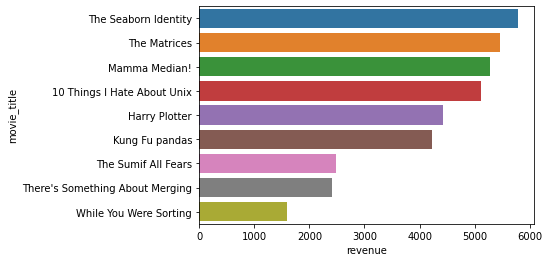

In [17]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the sales dataframe
df = pd.ExcelFile("movies.xlsx")
df_sales, df_types, df_theaters, df_movies = df.parse("sales"), df.parse("ticket types"), df.parse("theaters"), df.parse("movies")
sales = df_sales.merge(df_theaters, on="theater_name", how="left").merge(df_movies[["movie_title", "movie_genre"]], on="movie_title", how="left").merge(df_types, on="ticket_type", how="left")
sales["revenue"] = sales["ticket_quantity"]*sales["ticket_price"]
sales = sales[["theater_location", "movie_title",  "movie_genre", "ticket_type", "ticket_quantity",  "ticket_price",  "revenue"]]

movie_totals = sales.groupby('movie_title', as_index=False).sum()
movie_totals = movie_totals.sort_values('revenue', ascending=False).reset_index(drop=True)

# Create barplot
sns.barplot(x='revenue', y='movie_title', data=movie_totals)

# Display barplot
plt.show()


# **Best genres**

* Use `sns.barplot()` to create a graph of genre_totals with `movie_genre` on the x axis and revenue on the y-axis.

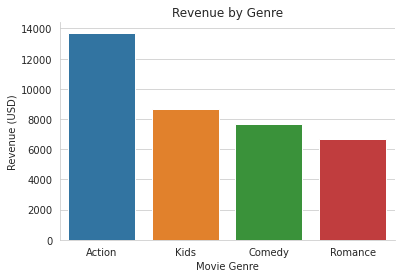

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the sales dataframe
df = pd.ExcelFile("movies.xlsx")
df_sales, df_types, df_theaters, df_movies = df.parse("sales"), df.parse("ticket types"), df.parse("theaters"), df.parse("movies")
sales = df_sales.merge(df_theaters, on="theater_name", how="left").merge(df_movies[["movie_title", "movie_genre"]], on="movie_title", how="left").merge(df_types, on="ticket_type", how="left")
sales["revenue"] = sales["ticket_quantity"]*sales["ticket_price"]
sales = sales[["theater_location", "movie_title",  "movie_genre", "ticket_type", "ticket_quantity",  "ticket_price",  "revenue"]]
genre_totals = sales.groupby('movie_genre', as_index=False).sum()
genre_totals = genre_totals.sort_values('revenue', ascending=False).reset_index(drop=True)

# Create barplot
sns.set_style("whitegrid")
sns.barplot(x="movie_genre", y="revenue", data=genre_totals)
plt.title("Revenue by Genre")
plt.xlabel("Movie Genre")
plt.ylabel("Revenue (USD)")
sns.despine()
# Display barplot
plt.show()


## **Hue**

* Create a bar plot of `genre_market_totals` with `theater_location` on the x-axis, `revenue` on the y-axis, and `hue` broken down by `movie_genre`.
* Add the title `Genre Performance by Market`, as well as the x- and y-axis labels as `Market` and `Revenue (USD)`, respectively.

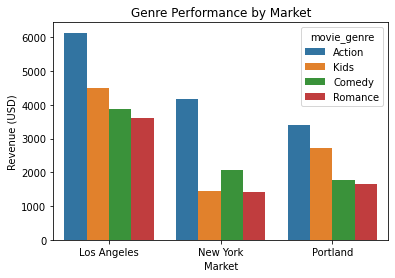

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the sales dataframe
df = pd.ExcelFile("movies.xlsx")
df_sales, df_types, df_theaters, df_movies = df.parse("sales"), df.parse("ticket types"), df.parse("theaters"), df.parse("movies")
sales = df_sales.merge(df_theaters, on="theater_name", how="left").merge(df_movies[["movie_title", "movie_genre"]], on="movie_title", how="left").merge(df_types, on="ticket_type", how="left")
sales["revenue"] = sales["ticket_quantity"]*sales["ticket_price"]
sales = sales[["theater_location", "movie_title",  "movie_genre", "ticket_type", "ticket_quantity",  "ticket_price",  "revenue"]]

# Create genre_market_totals
genre_market_totals = sales.groupby(['movie_genre', "theater_location"], as_index=False).sum()
genre_market_totals = genre_market_totals.sort_values('revenue', ascending=False).reset_index(drop=True).drop("ticket_price", axis=1)   

# Create barplot
sns.barplot(x="theater_location", y="revenue", hue="movie_genre", data=genre_market_totals)

# Add labels
plt.title('Genre Performance by Market')
plt.xlabel('Market')
plt.ylabel('Revenue (USD)')

plt.show()



## **Genre by ticket type**

* Create a bar plot of `genre_ticket_totals` with `ticket_type` on the x-axis, `ticket_quantity` on the y-axis, and hue broken down by `movie_genre`.
* Add the title `Genre Turnout by Ticket Type`, as well as x- and y-axis labels as `Ticket Type` and `Tickets Sold`, respectively.

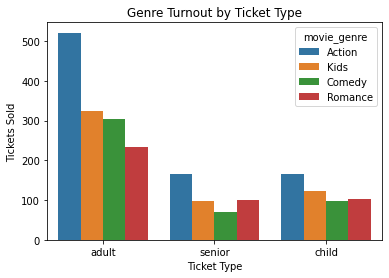

In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the sales dataframe
df = pd.ExcelFile("movies.xlsx")
df_sales, df_types, df_theaters, df_movies = df.parse("sales"), df.parse("ticket types"), df.parse("theaters"), df.parse("movies")
sales = df_sales.merge(df_theaters, on="theater_name", how="left").merge(df_movies[["movie_title", "movie_genre"]], on="movie_title", how="left").merge(df_types, on="ticket_type", how="left")
sales["revenue"] = sales["ticket_quantity"]*sales["ticket_price"]
sales = sales[["theater_location", "movie_title",  "movie_genre", "ticket_type", "ticket_quantity",  "ticket_price",  "revenue"]]

# Create genre_ticket_totals
genre_ticket_totals = sales.groupby(['movie_genre', "ticket_type"], as_index=False).sum()
genre_ticket_totals = genre_ticket_totals.sort_values('revenue', ascending=False).reset_index(drop=True).drop("ticket_price", axis=1)   

# Create barplot
sns.barplot(data=genre_ticket_totals, x="ticket_type", y="ticket_quantity", hue="movie_genre")

# Add labels
plt.title("Genre Turnout by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Tickets Sold")

plt.show()
